In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Drop the column which is not useful to us in the Linear Regression algorithm.

In [4]:
zirc = df.drop('Unnamed: 0', axis = 1)

In [5]:
zirc.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
zirc.shape

(26967, 10)

In [7]:
zirc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


# Checking for Duplicates

In [8]:
zirc.duplicated().sum()

34

In [9]:
(34/26967)*100

0.12608002373271035

As the duplicates are only 0.12% of the dataset, we can drop them

In [10]:
zirc.drop_duplicates(inplace=True) 

In [11]:
zirc.duplicated().sum()

0

### Check for Missing values

In [12]:
zirc.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Imputing missing values

There are missing values in depth column.  
As it's a continuous variable, we'll go with the median.

In [13]:
median1 = zirc["depth"].median()
zirc["depth"].replace(np.nan,median1,inplace=True)

In [14]:
zirc.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [15]:
zirc.describe().round(2)

,carat,depth,table,x,y,z,price
count,26933.00,26933.00,26933.00,26933.00,26933.00,26933.00,26933.00
mean,0.80,61.75,57.46,5.73,5.73,3.54,3937.53
std,0.48,1.39,2.23,1.13,1.17,0.72,4022.55
min,0.20,50.80,49.00,0.00,0.00,0.00,326.00
25%,0.40,61.10,56.00,4.71,4.71,2.90,945.00
50%,0.70,61.80,57.00,5.69,5.70,3.52,2375.00
75%,1.05,62.50,59.00,6.55,6.54,4.04,5356.00
max,4.50,73.60,79.00,10.23,58.90,31.80,18818.00


In [16]:
# create a list with only numeric data types
lstnumericcolumns = list(zirc.select_dtypes(include=[np.number]).columns.values)

In [17]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(zirc[column].describe().round(2),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(zirc[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=zirc[column])
    plt.show()

Description of carat
----------------------------------------------------------------------------
count    26933.00
mean         0.80
std          0.48
min          0.20
25%          0.40
50%          0.70
75%          1.05
max          4.50
Name: carat, dtype: float64 Distribution of carat
----------------------------------------------------------------------------


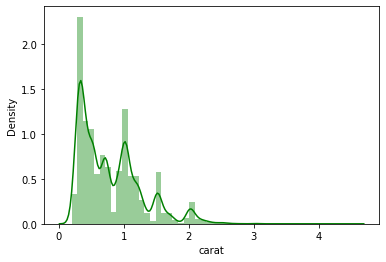

BoxPlot of carat
----------------------------------------------------------------------------


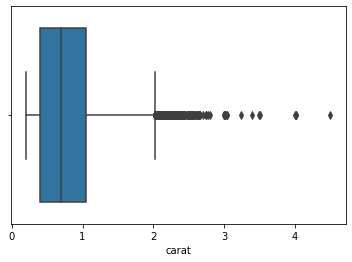

Description of depth
----------------------------------------------------------------------------
count    26933.00
mean        61.75
std          1.39
min         50.80
25%         61.10
50%         61.80
75%         62.50
max         73.60
Name: depth, dtype: float64 Distribution of depth
----------------------------------------------------------------------------


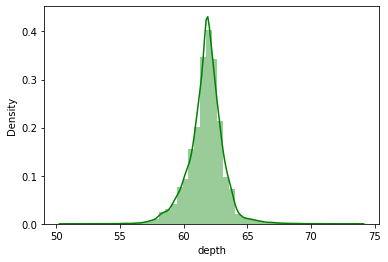

BoxPlot of depth
----------------------------------------------------------------------------


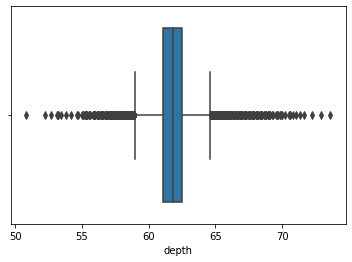

Description of table
----------------------------------------------------------------------------
count    26933.00
mean        57.46
std          2.23
min         49.00
25%         56.00
50%         57.00
75%         59.00
max         79.00
Name: table, dtype: float64 Distribution of table
----------------------------------------------------------------------------


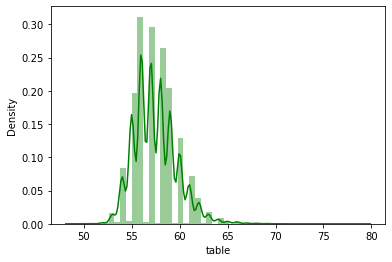

BoxPlot of table
----------------------------------------------------------------------------


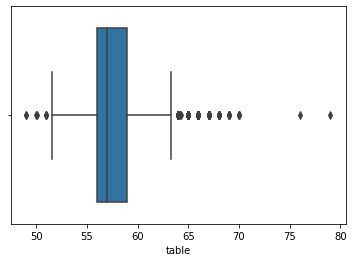

Description of x
----------------------------------------------------------------------------
count    26933.00
mean         5.73
std          1.13
min          0.00
25%          4.71
50%          5.69
75%          6.55
max         10.23
Name: x, dtype: float64 Distribution of x
----------------------------------------------------------------------------


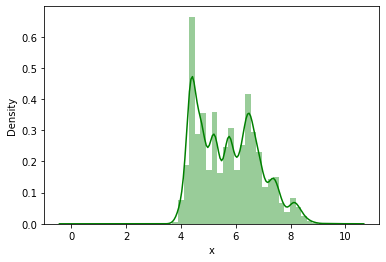

BoxPlot of x
----------------------------------------------------------------------------


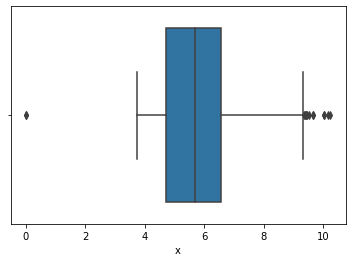

Description of y
----------------------------------------------------------------------------
count    26933.00
mean         5.73
std          1.17
min          0.00
25%          4.71
50%          5.70
75%          6.54
max         58.90
Name: y, dtype: float64 Distribution of y
----------------------------------------------------------------------------


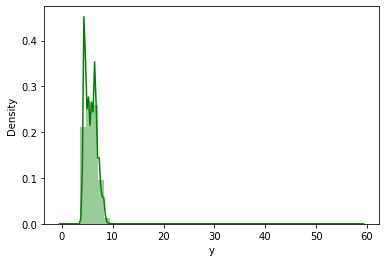

BoxPlot of y
----------------------------------------------------------------------------


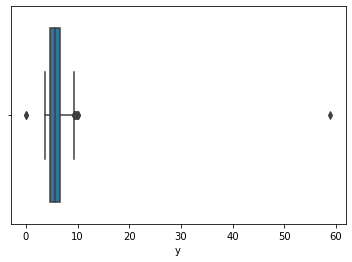

Description of z
----------------------------------------------------------------------------
count    26933.00
mean         3.54
std          0.72
min          0.00
25%          2.90
50%          3.52
75%          4.04
max         31.80
Name: z, dtype: float64 Distribution of z
----------------------------------------------------------------------------


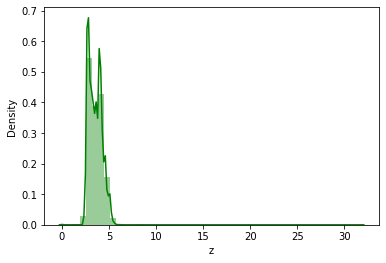

BoxPlot of z
----------------------------------------------------------------------------


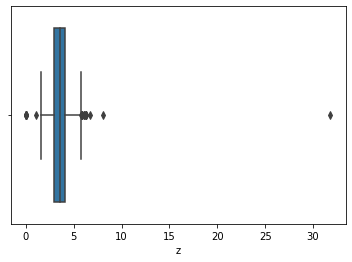

Description of price
----------------------------------------------------------------------------
count    26933.00
mean      3937.53
std       4022.55
min        326.00
25%        945.00
50%       2375.00
75%       5356.00
max      18818.00
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


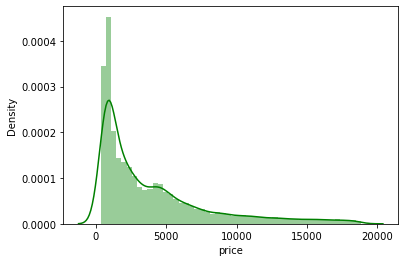

BoxPlot of price
----------------------------------------------------------------------------


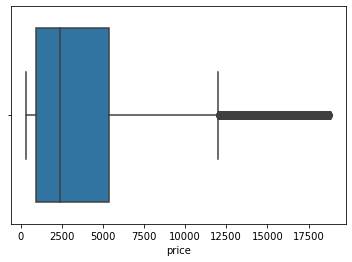

In [18]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

<AxesSubplot:xlabel='depth'>

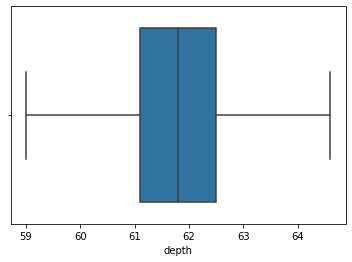

In [19]:
sns.boxplot(x=zirc['depth'], showfliers = False)

# Multivariate Analysis

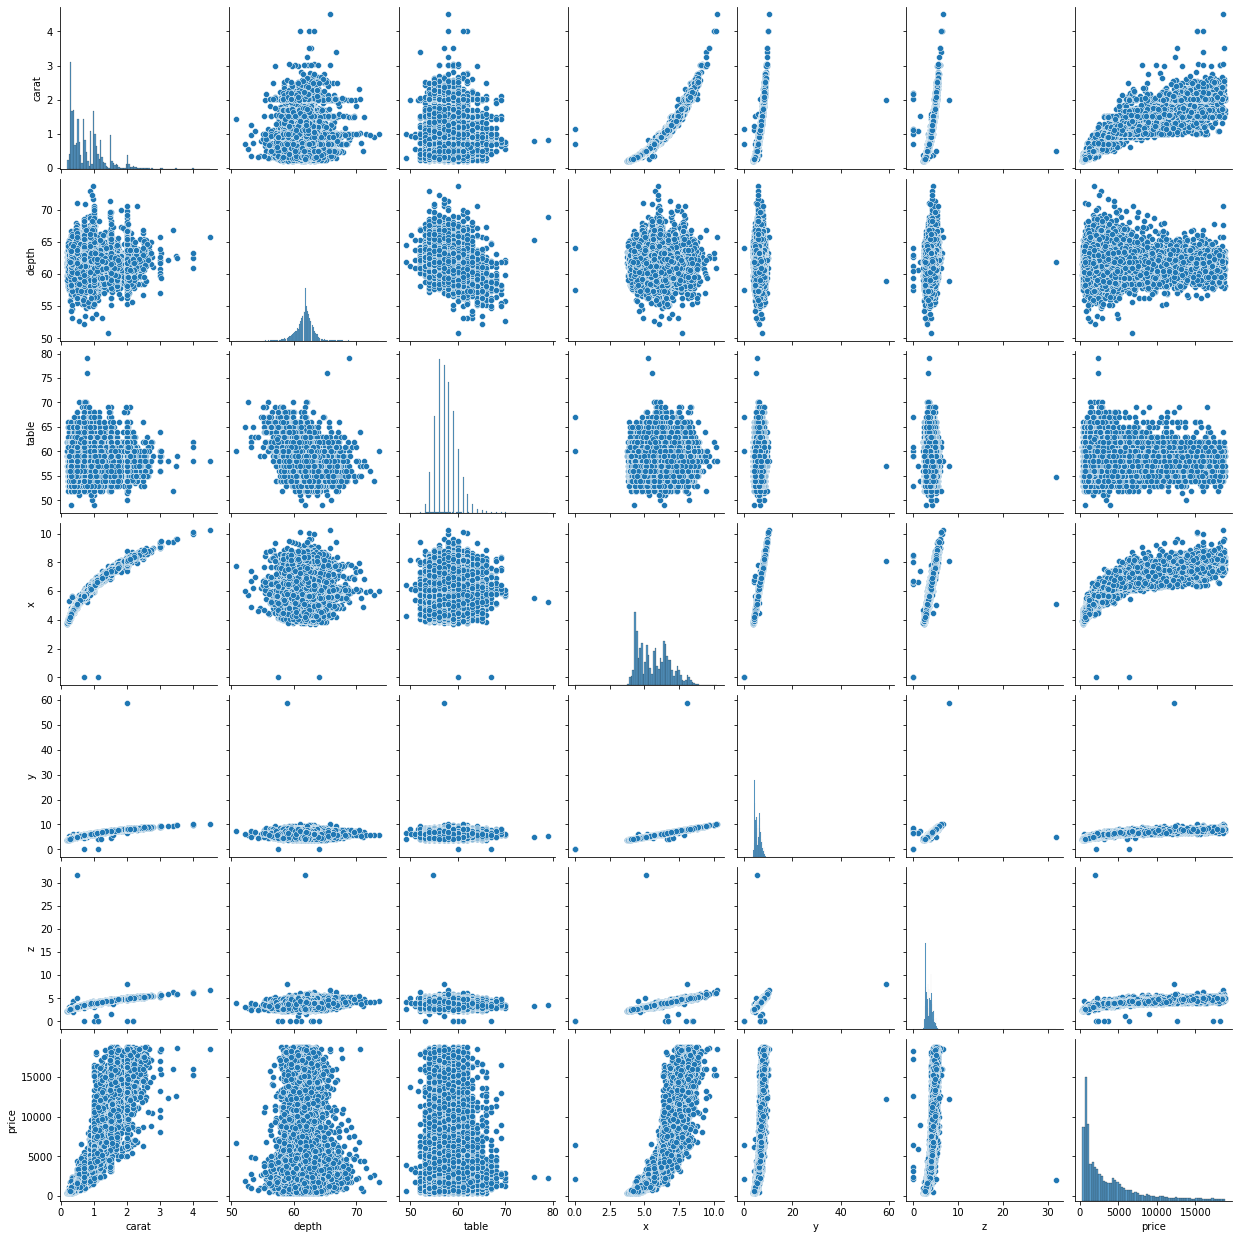

In [20]:
sns.pairplot(zirc)

## Correlation Heatmap

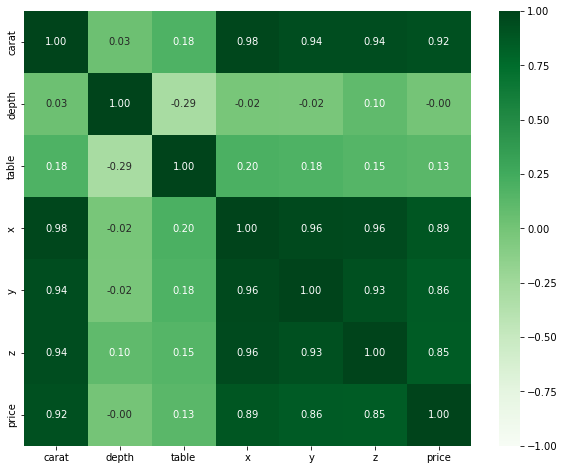

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(zirc.corr(), annot=True, fmt='.2f', cmap='Greens',vmin =-1, vmax =1)
plt.show()

### The variables 'x', 'y' and 'z' are highly correlated to each other and with the target variable -- 'price'

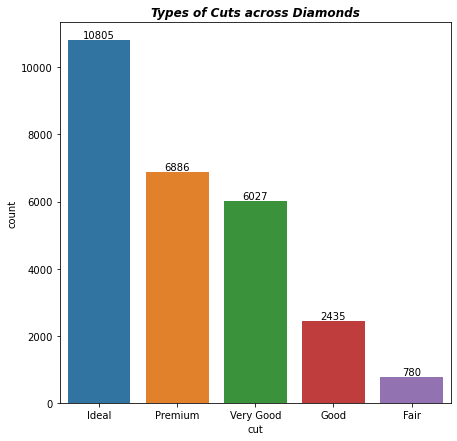

In [22]:
plt.figure(figsize =(7,7))
ax = sns.countplot(zirc['cut']);
ax.set_title("Types of Cuts across Diamonds", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');

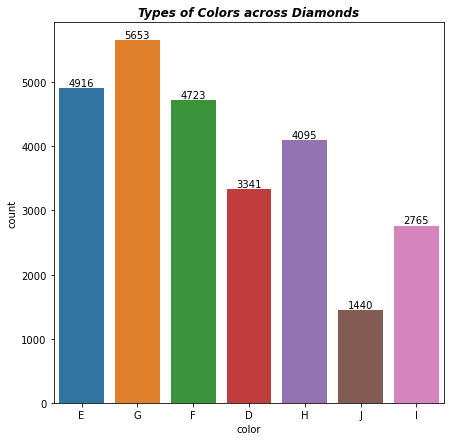

In [23]:
plt.figure(figsize =(7,7))
ax = sns.countplot(zirc['color']);
ax.set_title("Types of Colors across Diamonds", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');

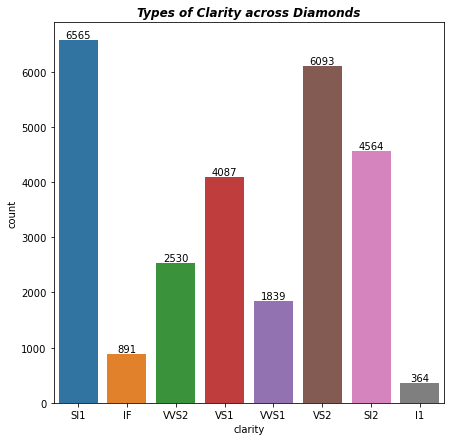

In [24]:
plt.figure(figsize =(7,7))
ax = sns.countplot(x = 'clarity', data = zirc);
ax.set_title("Types of Clarity across Diamonds", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');

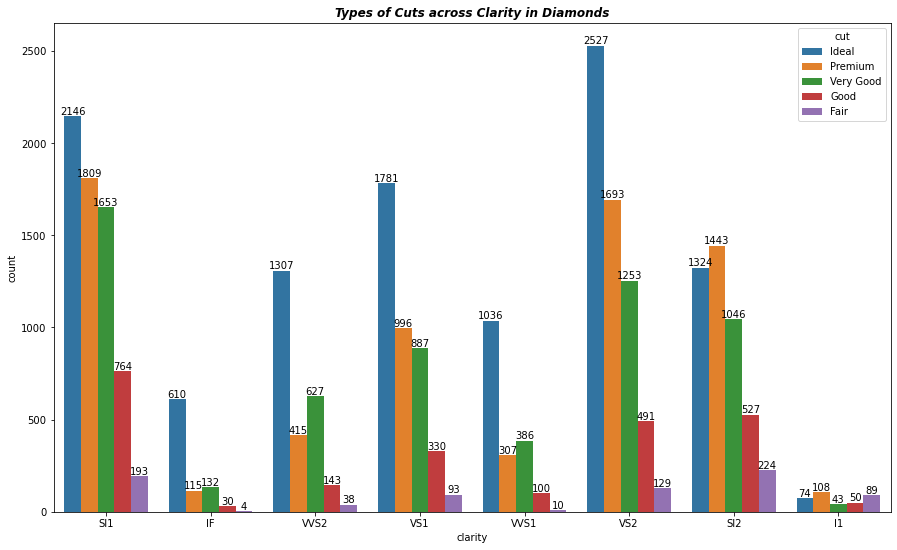

In [25]:
plt.figure(figsize =(15,9))
ax = sns.countplot(x = 'clarity', hue = 'cut', data = zirc);
ax.set_title("Types of Cuts across Clarity in Diamonds", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');
ax.bar_label(ax.containers[1], label_type='edge');
ax.bar_label(ax.containers[2], label_type='edge');
ax.bar_label(ax.containers[3], label_type='edge');
ax.bar_label(ax.containers[4], label_type='edge');

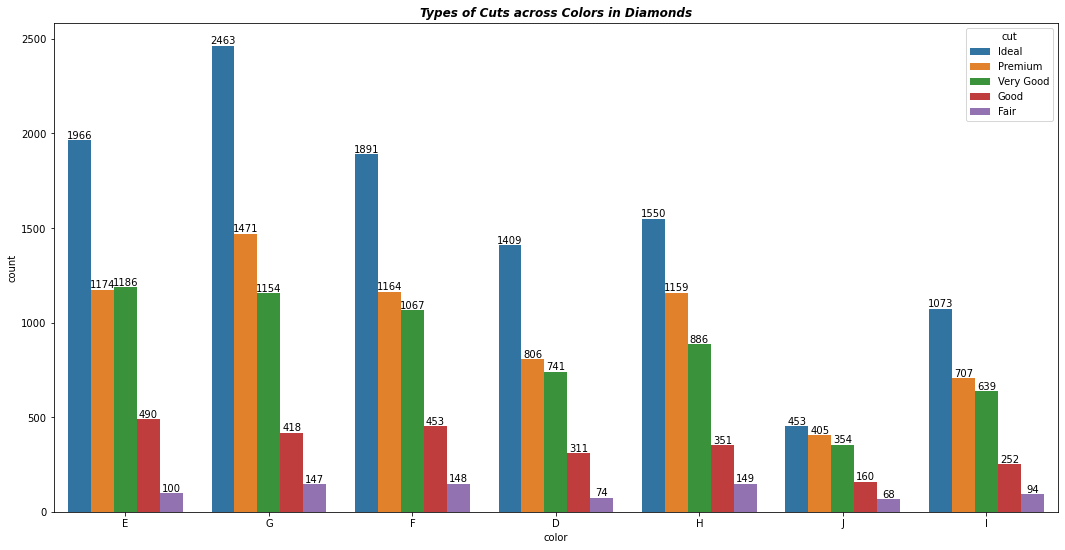

In [26]:
plt.figure(figsize =(18,9))
ax = sns.countplot(x = 'color', hue = 'cut', data = zirc);
ax.set_title("Types of Cuts across Colors in Diamonds", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');
ax.bar_label(ax.containers[1], label_type='edge');
ax.bar_label(ax.containers[2], label_type='edge');
ax.bar_label(ax.containers[3], label_type='edge');
ax.bar_label(ax.containers[4], label_type='edge');

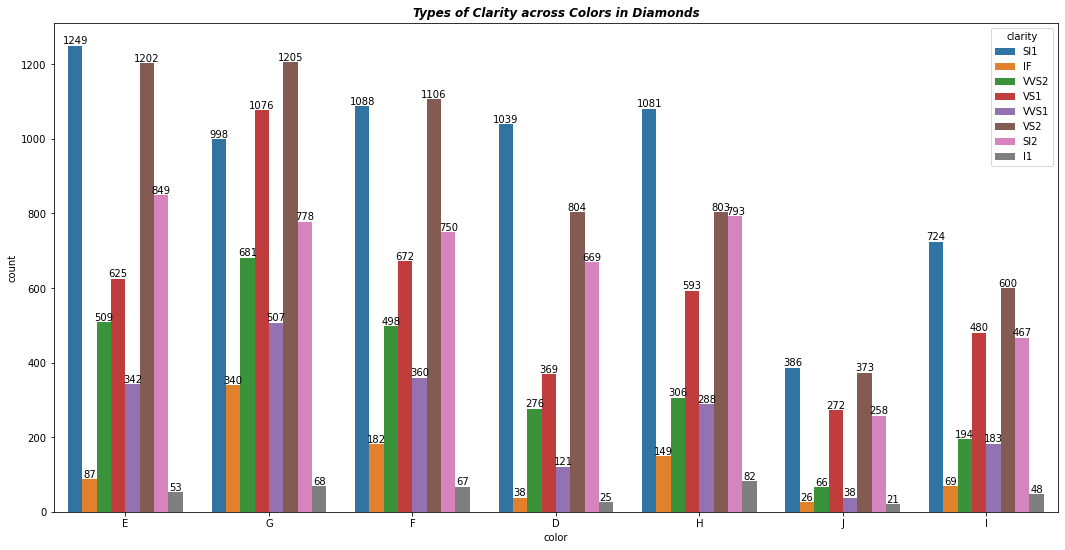

In [27]:
plt.figure(figsize =(18,9))
ax = sns.countplot(x = 'color', hue = 'clarity', data = zirc);
ax.set_title("Types of Clarity across Colors in Diamonds", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');
ax.bar_label(ax.containers[1], label_type='edge');
ax.bar_label(ax.containers[2], label_type='edge');
ax.bar_label(ax.containers[3], label_type='edge');
ax.bar_label(ax.containers[4], label_type='edge');
ax.bar_label(ax.containers[5], label_type='edge');
ax.bar_label(ax.containers[6], label_type='edge');
ax.bar_label(ax.containers[7], label_type='edge');

### Bi-Variate Analysis with Target variable

Text(0.5, 0.98, 'Diamond price distribution across carat')

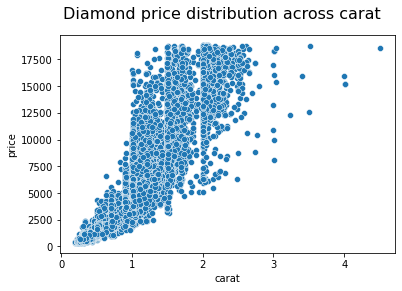

In [28]:
sns.scatterplot(x = "carat", y = "price", data = zirc )
plt.suptitle("Diamond price distribution across carat", fontsize =16)

Text(0.5, 0.98, 'Diamond price distribution across depth')

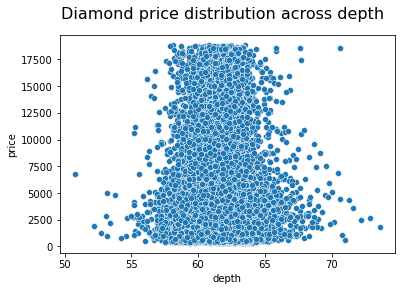

In [29]:
sns.scatterplot(x = "depth", y = "price", data = zirc )
plt.suptitle("Diamond price distribution across depth", fontsize =16)

Text(0.5, 0.98, 'Diamond price distribution across table')

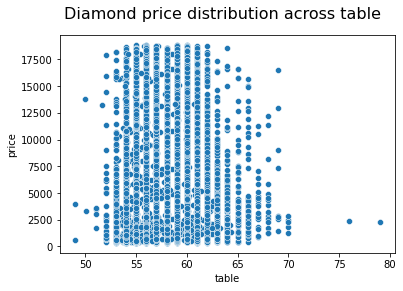

In [30]:
sns.scatterplot(x = "table", y = "price", data = zirc )
plt.suptitle("Diamond price distribution across table", fontsize =16)

### Dropping the variables which are highly correlated with each other and the target variable

In [31]:
zirc_c = zirc

In [33]:
zirc_c.drop(zirc_c.columns [[6, 7, 8]], axis =1, inplace= True)

In [34]:
zirc_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   price    26933 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.7+ MB


In [36]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. 
zirc_c = pd.get_dummies(zirc_c, columns=['cut', 'color', 'clarity'])

In [37]:
zirc_c.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,499,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,984,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6289,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,1082,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,779,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
zirc_c.dtypes

carat            float64
depth            float64
table            float64
price              int64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [39]:
zirc_c.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.80,0.48,0.2,0.4,0.7,1.05,4.5
depth,26933.0,61.75,1.39,50.8,61.1,61.8,62.50,73.6
table,26933.0,57.46,2.23,49.0,56.0,57.0,59.00,79.0
price,26933.0,3937.53,4022.55,326.0,945.0,2375.0,5356.00,18818.0
cut_Fair,26933.0,0.03,0.17,0.0,0.0,0.0,0.00,1.0
cut_Good,26933.0,0.09,0.29,0.0,0.0,0.0,0.00,1.0
cut_Ideal,26933.0,0.40,0.49,0.0,0.0,0.0,1.00,1.0
cut_Premium,26933.0,0.26,0.44,0.0,0.0,0.0,1.00,1.0
cut_Very Good,26933.0,0.22,0.42,0.0,0.0,0.0,0.00,1.0
color_D,26933.0,0.12,0.33,0.0,0.0,0.0,0.00,1.0


In [40]:
zirc_c.isnull().sum()

carat            0
depth            0
table            0
price            0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [41]:
cont=zirc_c.dtypes[(zirc_c.dtypes!='uint8') & (zirc_c.dtypes!='bool')].index

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = zirc_c[cont].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(zirc_c[cont].values, i)for i in range(len(zirc_c[cont].columns))]
  
print(vif_data)

  feature         VIF
0   carat   25.978196
1   depth  397.109633
2   table  406.112060
3   price   13.247173


## Scaling the dataset as continous variables have different weightage
# Scales the data; essentially returns the z-scores of every attribute

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

In [ ]:
#zirc_scaled['carat'] = std_scale.fit_transform(zirc_scaled[['carat']])
#zirc_scaled['depth'] = std_scale.fit_transform(zirc_scaled[['depth']])
#zirc_scaled['table'] = std_scale.fit_transform(zirc_scaled[['table']])

In [ ]:
#zirc_scaled.head()

**Split the Data**

In [45]:
# Train Test Split

x = zirc_c.drop('price', axis=1)

# Copy target into the y dataframe. 
y = zirc_c[['price']]

In [46]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [49]:
# Models to predict numeric output
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Model Performance & Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [50]:
from sklearn.metrics import mean_squared_error
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train.values.ravel())
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
     
                   index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        1159.773507  1151.312687        0.916329    0.919295
Decision Tree Regressor    34.179254   770.398133        0.999927    0.963864
Random Forest Regressor   221.820611   590.918411        0.996939    0.978740
ANN Regressor             570.188703   582.542869        0.979776    0.979338


**Grid Search on Decision Tree**

In [51]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 5)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15}


**Using Grid Search for Random Forest**

In [54]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5)

In [55]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [56]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


**Using Grid Search for ANN**

In [57]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 5)

In [58]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [60]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [61]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(100, 100), 
                    solver='adam',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 300,
                            random_state=123)
dtr = DecisionTreeRegressor(max_depth=15,min_samples_split=15,min_samples_leaf=3,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]


for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        1159.773507  1151.312687        0.916329    0.919295
Decision Tree Regressor   473.264505   659.511967        0.986067    0.973517
Random Forest Regressor   994.244191  1060.524446        0.938509    0.931521
ANN Regressor             572.455629   577.646930        0.979615    0.979684


Text(0.5, 0, 'Random Forest Feature Importance')

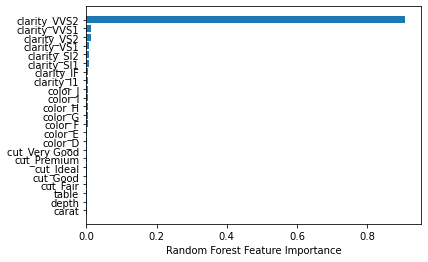

In [63]:
# this is for reference only
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(x_train.columns,rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [124]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Linear Regression Model

In [125]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [126]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2)))

The coefficient for carat is 8929.5
The coefficient for depth is -18.44
The coefficient for table is -24.24
The coefficient for cut_Fair is -584.25
The coefficient for cut_Good is -3.49
The coefficient for cut_Ideal is 260.4
The coefficient for cut_Premium is 164.29
The coefficient for cut_Very Good is 163.05
The coefficient for color_D is 841.53
The coefficient for color_E is 649.19
The coefficient for color_F is 524.08
The coefficient for color_G is 320.05
The coefficient for color_H is -165.24
The coefficient for color_I is -654.87
The coefficient for color_J is -1514.74
The coefficient for clarity_I1 is -3675.8
The coefficient for clarity_IF is 1601.53
The coefficient for clarity_SI1 is -250.77
The coefficient for clarity_SI2 is -1225.44
The coefficient for clarity_VS1 is 711.96
The coefficient for clarity_VS2 is 395.18
The coefficient for clarity_VVS1 is 1271.08
The coefficient for clarity_VVS2 is 1172.26


In [127]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0].round(2)

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1160.39


In [128]:
# R square on training data
regression_model.score(x_train, y_train).round(3)

0.916

92% of the variation in the price is explained by the predictors in the model for train set

In [129]:
# R square on testing data
regression_model.score(x_test, y_test).round(3)

0.919

In [130]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

1159.77

In [131]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

1151.31

### Linear Regression using statsmodels

In [132]:
# concatenate X and y into a single dataframe
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,0.34,62.4,60.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,537
2275,0.30,61.2,55.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,844
19183,0.50,62.5,57.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1240
5030,1.10,63.3,56.0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4065
25414,1.02,61.1,62.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4057


In [133]:
data_train.rename(columns = {"cut_Very Good": "cut_Very_Good"}, 
                      inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_Very_Good"}, 
                      inplace = True) 

In [134]:
data_train.columns

Index(['carat', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [135]:
expr = 'price ~ carat + depth + table + cut_Fair + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [136]:
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept        -790.530703
carat            8929.502594
depth             -18.444840
table             -24.235343
cut_Fair         -742.353743
cut_Good         -161.592492
cut_Ideal         102.291643
cut_Premium         6.180429
cut_Very_Good       4.943460
color_D           728.599757
color_E           536.254138
color_F           411.150529
color_G           207.118434
color_H          -278.176615
color_I          -767.807607
color_J         -1627.669339
clarity_I1      -3774.612927
clarity_IF       1502.717095
clarity_SI1      -349.587242
clarity_SI2     -1324.257831
clarity_VS1       613.140594
clarity_VS2       296.367059
clarity_VVS1     1172.259126
clarity_VVS2     1073.443423
dtype: float64

In [120]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.031e+04
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:07:59   Log-Likelihood:            -1.5978e+05
No. Observations:               18853   AIC:                         3.196e+05
Df Residuals:                   18832   BIC:                         3.198e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -790.5307    425.578     -1.858

In [121]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

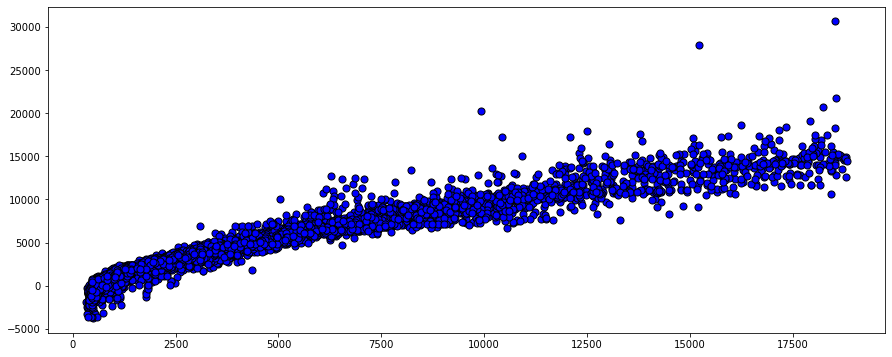

In [156]:
plt.figure(figsize =(15,6))
plt.scatter(y_test['price'],  y_pred, c='blue', edgecolor='black', s=50)
plt.show()

In [123]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-790.53) * Intercept + (8929.5) * carat + (-18.44) * depth + (-24.24) * table + (-742.35) * cut_Fair + (-161.59) * cut_Good + (102.29) * cut_Ideal + (6.18) * cut_Premium + (4.94) * cut_Very_Good + (728.6) * color_D + (536.25) * color_E + (411.15) * color_F + (207.12) * color_G + (-278.18) * color_H + (-767.81) * color_I + (-1627.67) * color_J + (-3774.61) * clarity_I1 + (1502.72) * clarity_IF + (-349.59) * clarity_SI1 + (-1324.26) * clarity_SI2 + (613.14) * clarity_VS1 + (296.37) * clarity_VS2 + (1172.26) * clarity_VVS1 + (1073.44) * clarity_VVS2 + 

 # Conclusion

The final Linear Regression equation is  
 
<b>price = (-790.53) * Intercept + (8929.5) * carat + (-18.44) * depth + (-24.24) * table + (-742.35) * cut_Fair + (-161.59) * cut_Good + (102.29) * cut_Ideal + (6.18) * cut_Premium + (4.94) * cut_Very_Good + (728.6) * color_D + (536.25) * color_E + (411.15) * color_F + (207.12) * color_G + (-278.18) * color_H + (-767.81) * color_I + (-1627.67) * color_J + (-3774.61) * clarity_I1 + (1502.72) * clarity_IF + (-349.59) * clarity_SI1 + (-1324.26) * clarity_SI2 + (613.14) * clarity_VS1 + (296.37) * clarity_VS2 + (1172.26) * clarity_VVS1 + (1073.44) * clarity_VVS2
</b>
